
*   **Author:** Andrés Carrillo López

*   **Project:** Bachelor Thesis - Clasificación de documentos basada en definiciones de categorías.
*   **GitHub Repo:** [source](https://github.com/andresC98/One-Shot-DocClassifier)


---



**Goals of this notebook:**

1.   Show project library examples of use of: Dataset extractors (*Wiki/arXiv Parsers*) and Classifiers (Baseline and *MaxSimClassifier*) for document classification using topic definitions.

2.   Perform hyperparameter search of models to obtain best suited configurations.

3.   Evaluate best configurations of models on test set and compare baseline with MaxSimClassifier.

*Note: use notebook Index of Contents (left side in Colab notebook) to navigate easily through notebook contents.*

---


**Table of Notebook Contents:**


1.   Project repository and library downloads/installation.
2.   Dataset retrieval using library *arXiv* and *Wiki* Parsers.
3.   Vectorization and Train/Test sets construction.
4.   Baseline classifiers: Grid Search and Evaluation

    4.1.   Support Vector Machine
    
    4.2.   Multinomial Naive Bayes

    4.3.   Feed Forward Neural Network

5.  Maximum Similarity Classifier: Grid search and Evaluation
6.  Comparing classification via topic definitions against other approaches 






#1. Project repository download and Library installations

###Prerequisites (ext. libraries)

In [ ]:
#Prerequisites (external libraries not found in Google Colab)
!pip install wikipedia
!pip install wikipedia-api
###Baseline classifiers libraries###

#Keras Neural Network (Feedforward)
from keras.metrics import top_k_categorical_accuracy
from keras.backend import clear_session
from keras.models import Sequential
from keras.layers import Dense
#Computations 
import numpy as np
#Tables
import pandas as pd
from google.colab.data_table import DataTable
#Sklearn classifiers and utils
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

  Created wheel for wikipedia: filename=wikipedia-1.4.0-cp36-none-any.whl size=11686 sha256=1136751a847eca1f43bab50c9fd133c5e9b786dae06e69915722492d8bb63ebd
  Stored in directory: /root/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia
  Created wheel for wikipedia-api: filename=Wikipedia_API-0.5.4-cp36-none-any.whl size=13462 sha256=ac77da45bdf643911ae751d85eae749e92f5f4a4ef445d366367de603ed7ebd2
  Stored in directory: /root/.cache/pip/wheels/bf/40/42/ba1d497f3712281b659dd65b566fc868035c859239571a725a
Successfully built wikipedia-api


Using TensorFlow backend.


##Project repository download and imports

In [1]:
!git clone https://github.com/andresC98/One-Shot-DocClassifier.git
%cd One-Shot-DocClassifier/lib
!ls

Cloning into 'One-Shot-DocClassifier'...
remote: Enumerating objects: 285, done.
remote: Counting objects: 100% (285/285), done.
remote: Compressing objects: 100% (208/208), done.
remote: Total 285 (delta 155), reused 183 (delta 75), pack-reused 0
Receiving objects: 100% (285/285), 1.94 MiB | 1.95 MiB/s, done.
Resolving deltas: 100% (155/155), done.
/content/One-Shot-DocClassifier/lib
arxiv_parser.py  doc_utils.py  max_sim_classifier.py  wiki_parser.py


In [ ]:
###Importing project library###

import doc_utils #cleaning and other helper functions (visualization...)
from max_sim_classifier import MaxSimClassifier #maximum similarity classifier
#Parser libraries: wikipedia dataset and arxiv dataset
from arxiv_parser import arxiv_parser
from wiki_parser import concurrentGetWikiFullPage, concurrentGetAllCatArticles

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#2. Dataset retrieval using library *Parsers*

In [ ]:
#EXECUTE THIS IF EXTRACTED DATA WAS SAVED; OTHERWISE DO NOT AND EXECUTE NEXT CELLS INSTEAD
import pickle
#Note: if had data previously saved, upload to colab main folder, this will move to current dir
!mv ../../*.data .
wiki_topic_defs = pickle.load( open( "wiki_topic_defs.data", "rb" ))
wiki_articles = pickle.load( open( "wiki_articles.data", "rb" ))
arxiv_dataset = pickle.load( open( "arxiv_dataset.data", "rb" ))
arxiv_topic_defs = pickle.load( open( "arxiv_topic_defs.data", "rb" ))

## Wikipedia articles data (*WikiParser*)

In [ ]:
engineering_topic_defs = concurrentGetWikiFullPage(topics_list = doc_utils.ALL_TOPICS )

engineering_articles, n_test_samples = concurrentGetAllCatArticles(doc_utils.ALL_TOPICS, full_text_test=True)

Obtaining full wikipedia page for the topic: Chemical engineering. (Definition of Class #[0])
Obtaining full wikipedia page for the topic: Biomedical engineering. (Definition of Class #[1])
Obtaining full wikipedia page for the topic: Civil engineering. (Definition of Class #[2])
Obtaining full wikipedia page for the topic: Electrical engineering. (Definition of Class #[3])
Obtaining full wikipedia page for the topic: Mechanical engineering. (Definition of Class #[4])
Obtaining full wikipedia page for the topic: Aerospace engineering. (Definition of Class #[5])
Obtaining full wikipedia page for the topic: Software engineering. (Definition of Class #[6])
Obtaining full wikipedia page for the topic: Industrial engineering. (Definition of Class #[7])
Obtaining full wikipedia page for the topic: Computer engineering. (Definition of Class #[8])
Retrieved 38 articles from category topic 'Computer engineering'[TopicID:8]
Retrieved 57 articles from category topic 'Software engineering'[TopicID

## *arXiv* papers data (*arXiv Parser* + *WikiParser*)

In [ ]:
arxiv_topic_defs = concurrentGetWikiFullPage(topics_list = doc_utils.ARXIV_WIKI_TOPICS )

arxiv_dataset, paperslist = arxiv_parser(100)

Obtaining full wikipedia page for the topic: Computer science. (Definition of Class #[0])
Obtaining full wikipedia page for the topic: Economics. (Definition of Class #[1])
Obtaining full wikipedia page for the topic: Systems engineering. (Definition of Class #[2])Obtaining full wikipedia page for the topic: Mathematics. (Definition of Class #[3])

Obtaining full wikipedia page for the topic: Astrophysics. (Definition of Class #[4])
Obtaining full wikipedia page for the topic: Computational biology. (Definition of Class #[5])
Obtaining full wikipedia page for the topic: Quantitative finance. (Definition of Class #[6])
Obtaining full wikipedia page for the topic: Statistics. (Definition of Class #[7])
Retrieving papers for subject: computer_science
Retrieving papers for subject: economics
Retrieving papers for subject: eess
Retrieving papers for subject: mathematics
Retrieving papers for subject: physics
Retrieving papers for subject: q_biology
Retrieving papers for subject: q_finance
R

In [ ]:
#Saving data to disk for persistence/reusability
import pickle

pickle.dump( engineering_topic_defs, open( "wiki_topic_defs.data", "wb" ) )
pickle.dump( engineering_articles, open( "wiki_articles.data", "wb" ) )
pickle.dump( arxiv_topic_defs, open( "arxiv_topic_defs.data", "wb" ) )
pickle.dump( arxiv_dataset, open( "arxiv_dataset.data", "wb" ) )

#3. Vectorization and Train / Test sets construction

In [ ]:
#FFNN_W_S: FeedForward NeuralNet Wiki data with simple preprocessing (just tokenization)
#FFNN_W_C: FeedForward NeuralNet Wiki data with custom preprocessing (tokenization + lemmatization + stopwords filtering)
#FFNN_A_S: FeedForward NeuralNet Arxiv data with simple preprocessing (just tokenization)
#FFNN_A_C: FeedForward NeuralNet Arxiv data with custom preprocessing (tokenization + lemmatization + stopwords filtering)

x_train_FFNN_W_S, y_train_FFNN_W_S, x_test_FFNN_W_S, y_test_FFNN_W_S, dictionary_FFNN_W_S = doc_utils.processNeuralNetData(wiki_topic_defs,wiki_articles,dataset_type = "wiki",preprocess = 'simple')
x_train_FFNN_W_C, y_train_FFNN_W_C, x_test_FFNN_W_C, y_test_FFNN_W_C, dictionary_FFNN_W_C = doc_utils.processNeuralNetData(wiki_topic_defs,wiki_articles,dataset_type = "wiki",preprocess = 'custom')
x_train_FFNN_A_S, y_train_FFNN_A_S, x_test_FFNN_A_S, y_test_FFNN_A_S, dictionary_FFNN_A_S = doc_utils.processNeuralNetData(arxiv_topic_defs,arxiv_dataset,dataset_type = "arxiv",preprocess = 'simple')
x_train_FFNN_A_C, y_train_FFNN_A_C, x_test_FFNN_A_C, y_test_FFNN_A_C, dictionary_FFNN_A_C = doc_utils.processNeuralNetData(arxiv_topic_defs,arxiv_dataset,dataset_type = "arxiv",preprocess = 'custom')

#MSC ,SVM and MNB compatible (clf_data): NOTE: Preprocess type selected in pipeline later
x_train_CLF_W, y_train_CLF_W, x_test_CLF_W, y_test_CLF_W = doc_utils.processClassifierData(wiki_topic_defs, wiki_articles,topics = doc_utils.ALL_TOPICS,dataset_type ="wiki")
x_train_CLF_A, y_train_CLF_A, x_test_CLF_A, y_test_CLF_A = doc_utils.processClassifierData(arxiv_topic_defs, arxiv_dataset,topics = doc_utils.ARXIV_WIKI_TOPICS,dataset_type ="arxiv")

#4.  Baseline model's Hyperparameter GridSearch and Evaluation

## Support Vector Machine

### Wiki dataset

In [ ]:
best_svm_wiki_score = 0
svm_wiki_models_params = list()
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        for idf in [True, False]:
            for stop_words in ['english', None]:
                for ngram_range in [(1,1), (1,2)]:
                    #Training the SVM for the hyperparam  + preprocessing combinations
                    svm = Pipeline([('vect', CountVectorizer(stop_words=stop_words,ngram_range=ngram_range)),
                                    ('tfidf', TfidfTransformer(use_idf=idf)),
                                    ('clf', SVC(C=C, gamma=gamma)),
                                    ])    
                    svm.fit(x_train_CLF_W, y_train_CLF_W)
                    # evaluate the SVM on the test set
                    score = svm.score(x_test_CLF_W, y_test_CLF_W)

                    #keeping track of the combinations
                    params = {'C': C, 'gamma': gamma, 'idf': idf, 'stop_words':stop_words, 'ngram_range':ngram_range}
                    svm_wiki_models_params.append((score, params))

                    # if we got a better score, store the score and parameters
                    if score > best_svm_wiki_score:
                        best_svm_wiki_score = score
                        best_svm_wiki_parameters = {'C': C, 'gamma': gamma, 'idf': idf, 'stop_words':stop_words, 'ngram_range':ngram_range}

print("Best Top-1 Accuracy: {:.4f}".format(best_svm_wiki_score))#(Top-1 acc score)
print("Best parameters: {}".format(best_svm_wiki_parameters))

Best Top-1 Accuracy: 0.7357
Best parameters: {'C': 0.001, 'gamma': 0.001, 'idf': True, 'stop_words': 'english', 'ngram_range': (1, 1)}


In [ ]:
df = pd.DataFrame.from_dict(svm_wiki_models_params)
df.columns = ['Top1 Acc.', 'SVM Classifier Parameters']
DataTable(df.sort_values(by=['Top1 Acc.'], ascending=False))

,Top1 Acc.,SVM Classifier Parameters
0,0.735678,"{'C': 0.001, 'gamma': 0.001, 'idf': True, 'sto..."
32,0.735678,"{'C': 10, 'gamma': 0.001, 'idf': True, 'stop_w..."
48,0.735678,"{'C': 0.001, 'gamma': 0.01, 'idf': True, 'stop..."
56,0.735678,"{'C': 0.01, 'gamma': 0.01, 'idf': True, 'stop_..."
64,0.735678,"{'C': 0.1, 'gamma': 0.01, 'idf': True, 'stop_w..."
...,...,...
183,0.312563,"{'C': 10, 'gamma': 1, 'idf': False, 'stop_word..."
87,0.312563,"{'C': 10, 'gamma': 0.01, 'idf': False, 'stop_w..."
223,0.312563,"{'C': 1, 'gamma': 10, 'idf': False, 'stop_word..."
7,0.312563,"{'C': 0.001, 'gamma': 0.001, 'idf': False, 'st..."


In [ ]:
stop_words = best_svm_wiki_parameters['stop_words']
ngram_range = best_svm_wiki_parameters['ngram_range']
idf = best_svm_wiki_parameters['idf']
C = best_svm_wiki_parameters['C']
gamma = best_svm_wiki_parameters['gamma']

svm = Pipeline([('vect', CountVectorizer(stop_words=stop_words,ngram_range=ngram_range)),
                ('tfidf', TfidfTransformer(use_idf=idf)),
                ('clf', SVC(C=C, gamma=gamma)),
                ])    
svm.fit(x_train_CLF_W, y_train_CLF_W)

y_test_preds_class = svm.predict(x_test_CLF_W)
y_test_preds_proba = svm.decision_function(x_test_CLF_W)

In [ ]:
doc_utils.top2_acc(y_test_preds_proba, y_test_CLF_W,verbose=1)

TOP-1 acc.: 	0.736
TOP-2 acc.: 	0.881


(0.735678391959799, 0.8814070351758794)

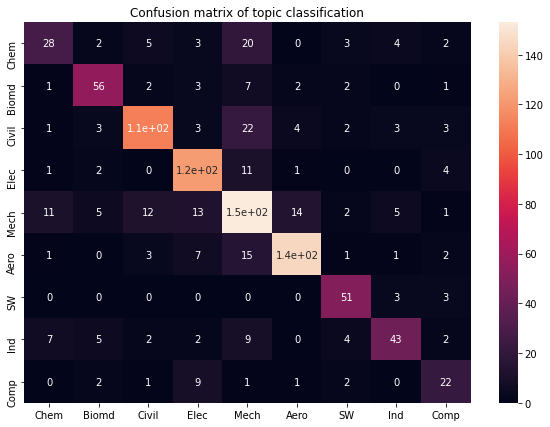

In [ ]:
doc_utils.plotConfMatrix(y_test_CLF_W, y_test_preds_class, model="SVM", dataset_type='wiki')

### arXiv dataset

In [ ]:
best_svm_arxiv_score = 0
svm_arxiv_models_params = list()
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        for idf in [True, False]:
            for stop_words in ['english', None]:
                for ngram_range in [(1,1), (1,2)]:
                    #Training the SVM for the hyperparam  + preprocessing combinations
                    svm = Pipeline([('vect', CountVectorizer(stop_words=stop_words,ngram_range=ngram_range)),
                                    ('tfidf', TfidfTransformer(use_idf=idf)),
                                    ('clf', SVC(C=C, gamma=gamma)),
                                    ])    
                    svm.fit(x_train_CLF_A, y_train_CLF_A)
                    # evaluate the SVM on the test set
                    score = svm.score(x_test_CLF_A, y_test_CLF_A)

                    #keeping track of the combinations
                    params = {'C': C, 'gamma': gamma, 'idf': idf, 'stop_words':stop_words, 'ngram_range':ngram_range}
                    svm_arxiv_models_params.append((score, params))

                    # if we got a better score, store the score and parameters
                    if score > best_svm_arxiv_score:
                        best_svm_arxiv_score = score
                        best_svm_arxiv_parameters = {'C': C, 'gamma': gamma, 'idf': idf, 'stop_words':stop_words, 'ngram_range':ngram_range}

print("Best Top-1 Accuracy: {:.4f}".format(best_svm_arxiv_score))#(Top-1 acc score)
print("Best parameters: {}".format(best_svm_arxiv_parameters))

Best Top-1 Accuracy: 0.4188
Best parameters: {'C': 0.001, 'gamma': 0.001, 'idf': True, 'stop_words': 'english', 'ngram_range': (1, 2)}


In [ ]:
df = pd.DataFrame.from_dict(svm_arxiv_models_params)
df.columns = ['Top1 Acc.', 'SVM Classifier Parameters']
DataTable(df.sort_values(by=['Top1 Acc.'], ascending=False))

,Top1 Acc.,SVM Classifier Parameters
65,0.41875,"{'C': 0.1, 'gamma': 0.01, 'idf': True, 'stop_w..."
217,0.41875,"{'C': 1, 'gamma': 10, 'idf': True, 'stop_words..."
129,0.41875,"{'C': 10, 'gamma': 0.1, 'idf': True, 'stop_wor..."
201,0.41875,"{'C': 0.01, 'gamma': 10, 'idf': True, 'stop_wo..."
25,0.41875,"{'C': 1, 'gamma': 0.001, 'idf': True, 'stop_wo..."
...,...,...
223,0.20125,"{'C': 1, 'gamma': 10, 'idf': False, 'stop_word..."
231,0.20125,"{'C': 10, 'gamma': 10, 'idf': False, 'stop_wor..."
15,0.20125,"{'C': 0.01, 'gamma': 0.001, 'idf': False, 'sto..."
239,0.20125,"{'C': 100, 'gamma': 10, 'idf': False, 'stop_wo..."


In [ ]:
stop_words = best_svm_arxiv_parameters['stop_words']
ngram_range = best_svm_arxiv_parameters['ngram_range']
idf = best_svm_arxiv_parameters['idf']
C = best_svm_arxiv_parameters['C']
gamma = best_svm_arxiv_parameters['gamma']

svm = Pipeline([('vect', CountVectorizer(stop_words=stop_words,ngram_range=ngram_range)),
                ('tfidf', TfidfTransformer(use_idf=idf)),
                ('clf', SVC(C=C, gamma=gamma)),
                ])    
svm.fit(x_train_CLF_A, y_train_CLF_A)

y_test_preds_class = svm.predict(x_test_CLF_A)
y_test_preds_proba = svm.decision_function(x_test_CLF_A)

In [ ]:
doc_utils.top2_acc(y_test_preds_proba, y_test_CLF_A,verbose=1)

TOP-1 acc.: 	0.419
TOP-2 acc.: 	0.606


(0.41875, 0.60625)

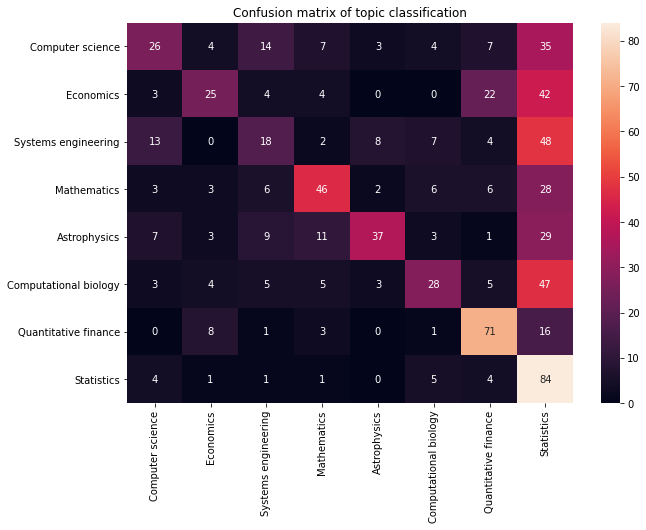

In [ ]:
doc_utils.plotConfMatrix(y_test_CLF_A, y_test_preds_class, model="SVM", dataset_type='arxiv')

## Multinomial Naive Bayes

###Wiki dataset

In [ ]:
best_mnb_wiki_score = 0
mnb_wiki_models_params = list()
for alpha in [0.001, 0.01, 0.1, 1]:
    for idf in [True, False]:
        for stop_words in ['english', None]:
            for ngram_range in [(1,1), (1,2)]:
                # for each combination of parameters, train a MNB
                mnb = Pipeline([('vect', CountVectorizer(stop_words=stop_words,ngram_range=ngram_range)),
                                ('tfidf', TfidfTransformer(use_idf=idf)),
                                ('clf', MultinomialNB(alpha=alpha)),
                                ])    
                mnb.fit(x_train_CLF_W, y_train_CLF_W)
                # evaluate the MNB on the test set
                score = mnb.score(x_test_CLF_W, y_test_CLF_W)

                params = {'alpha': alpha, 'idf': idf, 'stop_words':stop_words, 'ngram_range':ngram_range}
                mnb_wiki_models_params.append((score, params))
                # if we got a better score, store the score and parameters
                if score > best_mnb_wiki_score:
                    best_mnb_wiki_score = score
                    best_mnb_wiki_parameters = {'alpha': alpha, 'idf': idf, 'stop_words':stop_words, 'ngram_range':ngram_range}

print("Best score: {:.3f}".format(best_mnb_wiki_score))#(Top-1 acc score)
print("Best parameters: {}".format(best_mnb_wiki_parameters))

Best score: 0.740
Best parameters: {'alpha': 1, 'idf': True, 'stop_words': 'english', 'ngram_range': (1, 1)}


In [ ]:
df = pd.DataFrame.from_dict(mnb_wiki_models_params)
df.columns = ['Top1 Acc.', 'MNB Classifier Parameters']
DataTable(df.sort_values(by=['Top1 Acc.'], ascending=False))

,Top1 Acc.,MNB Classifier Parameters
24,0.739698,"{'alpha': 1, 'idf': True, 'stop_words': 'engli..."
25,0.736683,"{'alpha': 1, 'idf': True, 'stop_words': 'engli..."
16,0.735678,"{'alpha': 0.1, 'idf': True, 'stop_words': 'eng..."
17,0.735678,"{'alpha': 0.1, 'idf': True, 'stop_words': 'eng..."
9,0.711558,"{'alpha': 0.01, 'idf': True, 'stop_words': 'en..."
8,0.701508,"{'alpha': 0.01, 'idf': True, 'stop_words': 'en..."
29,0.692462,"{'alpha': 1, 'idf': False, 'stop_words': 'engl..."
21,0.692462,"{'alpha': 0.1, 'idf': False, 'stop_words': 'en..."
13,0.687437,"{'alpha': 0.01, 'idf': False, 'stop_words': 'e..."
20,0.686432,"{'alpha': 0.1, 'idf': False, 'stop_words': 'en..."


In [ ]:
stop_words = best_mnb_wiki_parameters['stop_words']
ngram_range = best_mnb_wiki_parameters['ngram_range']
idf = best_mnb_wiki_parameters['idf']
alpha = best_mnb_wiki_parameters['alpha']

mnb = Pipeline([('vect', CountVectorizer(stop_words=stop_words,ngram_range=ngram_range)),
                ('tfidf', TfidfTransformer(use_idf=idf)),
                ('clf', MultinomialNB(alpha=alpha)),
                ])    
mnb.fit(x_train_CLF_W, y_train_CLF_W) 

y_test_preds_class = mnb.predict(x_test_CLF_W)
y_test_preds_proba = mnb.predict_proba(x_test_CLF_W)

In [ ]:
doc_utils.top2_acc(y_test_preds_proba, y_test_CLF_W,verbose=1)

TOP-1 acc.: 	0.740
TOP-2 acc.: 	0.879


(0.7396984924623116, 0.8793969849246231)

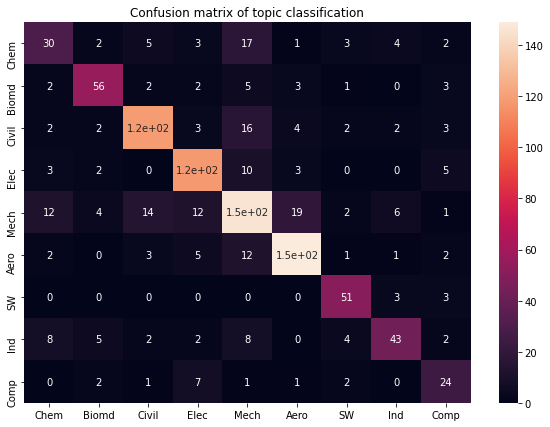

In [ ]:
doc_utils.plotConfMatrix(y_test_CLF_W, y_test_preds_class, model="NB", dataset_type='wiki')

### arXiv dataset

In [ ]:
best_mnb_arxiv_score = 0
mnb_arxiv_models_params = list()
for alpha in [0.001, 0.01, 0.1, 1]:
    for idf in [True, False]:
        for stop_words in ['english', None]:
            for ngram_range in [(1,1), (1,2)]:
                # for each combination of parameters, train a MNB
                mnb = Pipeline([('vect', CountVectorizer(stop_words=stop_words,ngram_range=ngram_range)),
                                ('tfidf', TfidfTransformer(use_idf=idf)),
                                ('clf', MultinomialNB(alpha=alpha)),
                                ])    
                mnb.fit(x_train_CLF_A, y_train_CLF_A)
                # evaluate the MNB on the test set
                score = mnb.score(x_test_CLF_A, y_test_CLF_A)

                params = {'alpha': alpha, 'idf': idf, 'stop_words':stop_words, 'ngram_range':ngram_range}
                mnb_arxiv_models_params.append((score, params))
                # if we got a better score, store the score and parameters
                if score > best_mnb_arxiv_score:
                    best_mnb_arxiv_score = score
                    best_mnb_arxiv_parameters = {'alpha': alpha, 'idf': idf, 'stop_words':stop_words, 'ngram_range':ngram_range}

print("Best score: {:.3f}".format(best_mnb_arxiv_score)) #(Top-1 acc score)
print("Best parameters: {}".format(best_mnb_arxiv_parameters))

Best score: 0.429
Best parameters: {'alpha': 0.1, 'idf': True, 'stop_words': 'english', 'ngram_range': (1, 1)}


In [ ]:
stop_words = best_mnb_arxiv_parameters['stop_words']
ngram_range = best_mnb_arxiv_parameters['ngram_range']
idf = best_mnb_arxiv_parameters['idf']
alpha = best_mnb_arxiv_parameters['alpha']

mnb = Pipeline([('vect', CountVectorizer(stop_words=stop_words,ngram_range=ngram_range)),
                ('tfidf', TfidfTransformer(use_idf=idf)),
                ('clf', MultinomialNB(alpha=alpha)),
                ])    
mnb.fit(x_train_CLF_A, y_train_CLF_A) 

y_test_preds_class = mnb.predict(x_test_CLF_A)
y_test_preds_proba = mnb.predict_proba(x_test_CLF_A)

In [ ]:
doc_utils.top2_acc(y_test_preds_proba, y_test_CLF_A,verbose=1)

TOP-1 acc.: 	0.429
TOP-2 acc.: 	0.623


(0.42875, 0.6225)

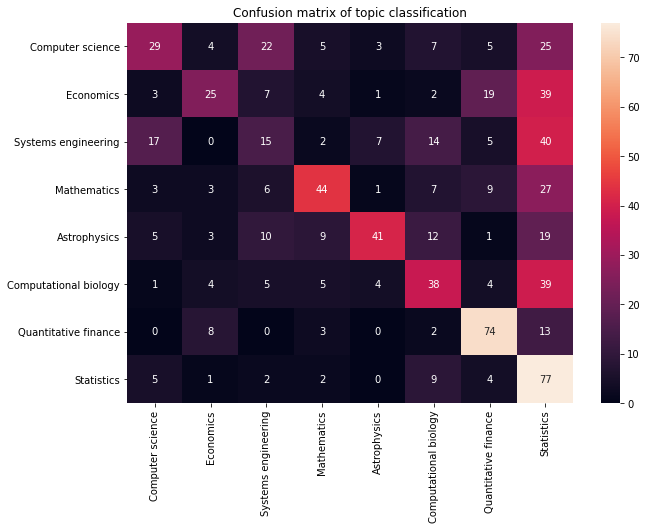

In [ ]:
doc_utils.plotConfMatrix(y_test_CLF_A, y_test_preds_class, model="NB", dataset_type='arxiv')

## Feed Forward Neural Network

In [ ]:
from tqdm.notebook import tqdm
#Defining TOP-2 accuracy 
import functools
top2_accuracy = functools.partial(top_k_categorical_accuracy, k=2)
top2_accuracy.__name__ = 'TOP2_ACC'

### Neural Architecture Search

In [ ]:
top1_acc_list = []
top2_acc_list = []

n_runs = 30

for i in tqdm(range(n_runs)):
    clear_session()
    #Neural Architecture Definition
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(len(dictionary_FFNN_W_S),)))
    model.add(Dense(len(doc_utils.ALL_TOPICS), activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy', top2_accuracy])
    hist = model.fit(x_train_FFNN_W_S, y_train_FFNN_W_S, epochs=3,verbose=0)
    model_top1_acc = model.evaluate(x_test_FFNN_W_S, y_test_FFNN_W_S, verbose=0)[1]
    model_top2_acc = model.evaluate(x_test_FFNN_W_S, y_test_FFNN_W_S, verbose=0)[2]
         
    if top2_acc_list and model_top2_acc >= max(top2_acc_list):
        #save best model to date
        model_json = model.to_json()
        with open("wiki_model_arq1.json", "w") as f:
            f.write(model_json)
        model.save_weights("wiki_model_arq1.h5")
    
    top1_acc_list.append(model_top1_acc)
    top2_acc_list.append(model_top2_acc)

print("\nResulting Average TOP1 acc:{}\t TOP2 acc:{}".format(np.mean(top1_acc_list),np.mean(top2_acc_list)))
print("Best model accuracies: TOP1:{} \t TOP2:{}".format(max(top1_acc_list), max(top2_acc_list)))



Resulting Average TOP1 acc:0.20160803919037182	 TOP2 acc:0.3651591305931409
Best model accuracies: TOP1:0.286432147026062 	 TOP2:0.48040202260017395


Same as prev. test but for complex preprocessing of text:

In [ ]:
top1_acc_list = []
top2_acc_list = []

n_runs = 30

for i in tqdm(range(n_runs)):
    clear_session()
    #Neural Architecture Definition
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(len(dictionary_FFNN_W_C),)))
    model.add(Dense(len(doc_utils.ALL_TOPICS), activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy', top2_accuracy])
    hist = model.fit(x_train_FFNN_W_C, y_train_FFNN_W_C, epochs=3,verbose=0)
    model_top1_acc = model.evaluate(x_test_FFNN_W_C, y_test_FFNN_W_C, verbose=0)[1]
    model_top2_acc = model.evaluate(x_test_FFNN_W_C, y_test_FFNN_W_C, verbose=0)[2]
         
    if top2_acc_list and model_top2_acc >= max(top2_acc_list):
        #save best model to date
        model_json = model.to_json()
        with open("wiki_model_arq1.json", "w") as f:
            f.write(model_json)
        model.save_weights("wiki_model_arq1.h5")
    
    top1_acc_list.append(model_top1_acc)
    top2_acc_list.append(model_top2_acc)

print("\nResulting Average TOP1 acc:{}\t TOP2 acc:{}".format(np.mean(top1_acc_list),np.mean(top2_acc_list)))
print("Best model accuracies: TOP1:{} \t TOP2:{}".format(max(top1_acc_list), max(top2_acc_list)))



Resulting Average TOP1 acc:0.32288107126951215	 TOP2 acc:0.4905192623535792
Best model accuracies: TOP1:0.42412060499191284 	 TOP2:0.5869346857070923


In [ ]:
top1_acc_list = []
top2_acc_list = []
n_runs = 30

for i in tqdm(range(n_runs)):
    clear_session()
    #Neural Architecture Definition
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(len(dictionary_FFNN_W_S),)))
    model.add(Dense(len(doc_utils.ALL_TOPICS), activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy', top2_accuracy])
    hist = model.fit(x_train_FFNN_W_S, y_train_FFNN_W_S, epochs=3,verbose=0)
    model_top1_acc = model.evaluate(x_test_FFNN_W_S, y_test_FFNN_W_S, verbose=0)[1]
    model_top2_acc = model.evaluate(x_test_FFNN_W_S, y_test_FFNN_W_S, verbose=0)[2]
         
    if top2_acc_list and model_top2_acc >= max(top2_acc_list):
        #save best model to date
        model_json = model.to_json()
        with open("wiki_model_arq1.json", "w") as f:
            f.write(model_json)
        model.save_weights("wiki_model_arq1.h5")
    
    top1_acc_list.append(model_top1_acc)
    top2_acc_list.append(model_top2_acc)

print("\nResulting Average TOP1 acc:{}\t TOP2 acc:{}".format(np.mean(top1_acc_list),np.mean(top2_acc_list)))
print("Best model accuracies: TOP1:{} \t TOP2:{}".format(max(top1_acc_list), max(top2_acc_list)))



Resulting Average TOP1 acc:0.2473366841673851	 TOP2 acc:0.3868006691336632
Best model accuracies: TOP1:0.3487437069416046 	 TOP2:0.49648240208625793


In [ ]:
top1_acc_list = []
top2_acc_list = []

n_runs = 30

for i in tqdm(range(n_runs)):
    clear_session()
    #Neural Architecture Definition
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(len(dictionary_FFNN_W_C),)))
    model.add(Dense(len(doc_utils.ALL_TOPICS), activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy', top2_accuracy])
    hist = model.fit(x_train_FFNN_W_C, y_train_FFNN_W_C, epochs=3,verbose=0)
    model_top1_acc = model.evaluate(x_test_FFNN_W_C, y_test_FFNN_W_C, verbose=0)[1]
    model_top2_acc = model.evaluate(x_test_FFNN_W_C, y_test_FFNN_W_C, verbose=0)[2]
         
    if top2_acc_list and model_top2_acc >= max(top2_acc_list):
        #save best model to date
        model_json = model.to_json()
        with open("wiki_model_arq1.json", "w") as f:
            f.write(model_json)
        model.save_weights("wiki_model_arq1.h5")
    
    top1_acc_list.append(model_top1_acc)
    top2_acc_list.append(model_top2_acc)

print("\nResulting Average TOP1 acc:{}\t TOP2 acc:{}".format(np.mean(top1_acc_list),np.mean(top2_acc_list)))
print("Best model accuracies: TOP1:{} \t TOP2:{}".format(max(top1_acc_list), max(top2_acc_list)))



Resulting Average TOP1 acc:0.34170854339996976	 TOP2 acc:0.5201005011796951
Best model accuracies: TOP1:0.402010053396225 	 TOP2:0.6030150651931763


In [ ]:
top1_acc_list = []
top2_acc_list = []

n_runs = 30

for i in tqdm(range(n_runs)):
    clear_session()
    #Neural Architecture Definition
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(len(dictionary_FFNN_W_S),)))
    model.add(Dense(len(doc_utils.ALL_TOPICS), activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy', top2_accuracy])
    hist = model.fit(x_train_FFNN_W_S, y_train_FFNN_W_S, epochs=3,verbose=0)
    model_top1_acc = model.evaluate(x_test_FFNN_W_S, y_test_FFNN_W_S, verbose=0)[1]
    model_top2_acc = model.evaluate(x_test_FFNN_W_S, y_test_FFNN_W_S, verbose=0)[2]
         
    if top2_acc_list and model_top2_acc >= max(top2_acc_list):
        #save best model to date
        model_json = model.to_json()
        with open("wiki_model_arq1.json", "w") as f:
            f.write(model_json)
        model.save_weights("wiki_model_arq1.h5")
    
    top1_acc_list.append(model_top1_acc)
    top2_acc_list.append(model_top2_acc)

print("\nResulting Average TOP1 acc:{}\t TOP2 acc:{}".format(np.mean(top1_acc_list),np.mean(top2_acc_list)))
print("Best model accuracies: TOP1:{} \t TOP2:{}".format(max(top1_acc_list), max(top2_acc_list)))



Resulting Average TOP1 acc:0.28700167636076607	 TOP2 acc:0.44763818780581155
Best model accuracies: TOP1:0.42613065242767334 	 TOP2:0.5879396796226501


In [ ]:
top1_acc_list = []
top2_acc_list = []

n_runs = 30

for i in tqdm(range(n_runs)):
    clear_session()
    #Neural Architecture Definition
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(len(dictionary_FFNN_W_C),)))
    model.add(Dense(len(doc_utils.ALL_TOPICS), activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy', top2_accuracy])
    hist = model.fit(x_train_FFNN_W_C, y_train_FFNN_W_C, epochs=3,verbose=0)
    model_top1_acc = model.evaluate(x_test_FFNN_W_C, y_test_FFNN_W_C, verbose=0)[1]
    model_top2_acc = model.evaluate(x_test_FFNN_W_C, y_test_FFNN_W_C, verbose=0)[2]
         
    if top2_acc_list and model_top2_acc >= max(top2_acc_list):
        #save best model to date
        model_json = model.to_json()
        with open("wiki_model_arq1.json", "w") as f:
            f.write(model_json)
        model.save_weights("wiki_model_arq1.h5")
    
    top1_acc_list.append(model_top1_acc)
    top2_acc_list.append(model_top2_acc)

print("\nResulting Average TOP1 acc:{}\t TOP2 acc:{}".format(np.mean(top1_acc_list),np.mean(top2_acc_list)))
print("Best model accuracies: TOP1:{} \t TOP2:{}".format(max(top1_acc_list), max(top2_acc_list)))



Resulting Average TOP1 acc:0.371624789138635	 TOP2 acc:0.5495812426010768
Best model accuracies: TOP1:0.48040202260017395 	 TOP2:0.6502512693405151


In [ ]:
top1_acc_list = []
top2_acc_list = []

n_runs = 30

for i in tqdm(range(n_runs)):
    clear_session()
    #Neural Architecture Definition
    model = Sequential()
    model.add(Dense(256, activation='tanh', input_shape=(len(dictionary_FFNN_W_C),)))
    model.add(Dense(len(doc_utils.ALL_TOPICS), activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy', top2_accuracy])
    hist = model.fit(x_train_FFNN_W_C, y_train_FFNN_W_C, epochs=3,verbose=0)
    model_top1_acc = model.evaluate(x_test_FFNN_W_C, y_test_FFNN_W_C, verbose=0)[1]
    model_top2_acc = model.evaluate(x_test_FFNN_W_C, y_test_FFNN_W_C, verbose=0)[2]
         
    if top2_acc_list and model_top2_acc >= max(top2_acc_list):
        #save best model to date
        model_json = model.to_json()
        with open("wiki_model_arq1.json", "w") as f:
            f.write(model_json)
        model.save_weights("wiki_model_arq1.h5")
    
    top1_acc_list.append(model_top1_acc)
    top2_acc_list.append(model_top2_acc)

print("\nResulting Average TOP1 acc:{}\t TOP2 acc:{}".format(np.mean(top1_acc_list),np.mean(top2_acc_list)))
print("Best model accuracies: TOP1:{} \t TOP2:{}".format(max(top1_acc_list), max(top2_acc_list)))



Resulting Average TOP1 acc:0.27216080327828723	 TOP2 acc:0.43775544265906013
Best model accuracies: TOP1:0.38291457295417786 	 TOP2:0.544723629951477


In [ ]:
top1_acc_list = []
top2_acc_list = []

n_runs = 30

for i in tqdm(range(n_runs)):
    clear_session()
    #Neural Architecture Definition
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(len(dictionary_FFNN_W_C),)))
    model.add(Dense(len(doc_utils.ALL_TOPICS), activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy', top2_accuracy])
    hist = model.fit(x_train_FFNN_W_C, y_train_FFNN_W_C, epochs=3,verbose=0)
    model_top1_acc = model.evaluate(x_test_FFNN_W_C, y_test_FFNN_W_C, verbose=0)[1]
    model_top2_acc = model.evaluate(x_test_FFNN_W_C, y_test_FFNN_W_C, verbose=0)[2]
         
    if top2_acc_list and model_top2_acc >= max(top2_acc_list):
        #save best model to date
        model_json = model.to_json()
        with open("wiki_model_arq1.json", "w") as f:
            f.write(model_json)
        model.save_weights("wiki_model_arq1.h5")
    
    top1_acc_list.append(model_top1_acc)
    top2_acc_list.append(model_top2_acc)

print("\nResulting Average TOP1 acc:{}\t TOP2 acc:{}".format(np.mean(top1_acc_list),np.mean(top2_acc_list)))
print("Best model accuracies: TOP1:{} \t TOP2:{}".format(max(top1_acc_list), max(top2_acc_list)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  




Resulting Average TOP1 acc:0.37738693356513975	 TOP2 acc:0.553701842824618
Best model accuracies: TOP1:0.4522612988948822 	 TOP2:0.6291457414627075


In [ ]:
top1_acc_list = []
top2_acc_list = []

n_runs = 30

for i in tqdm(range(n_runs)):
    clear_session()
    #Neural Architecture Definition
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(len(dictionary_FFNN_W_C),)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(len(doc_utils.ALL_TOPICS), activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy', top2_accuracy])
    hist = model.fit(x_train_FFNN_W_C, y_train_FFNN_W_C, epochs=3,verbose=0)
    model_top1_acc = model.evaluate(x_test_FFNN_W_C, y_test_FFNN_W_C, verbose=0)[1]
    model_top2_acc = model.evaluate(x_test_FFNN_W_C, y_test_FFNN_W_C, verbose=0)[2]
         
    if top2_acc_list and model_top2_acc >= max(top2_acc_list):
        #save best model to date
        model_json = model.to_json()
        with open("wiki_model_arq1.json", "w") as f:
            f.write(model_json)
        model.save_weights("wiki_model_arq1.h5")
    
    top1_acc_list.append(model_top1_acc)
    top2_acc_list.append(model_top2_acc)

print("\nResulting Average TOP1 acc:{}\t TOP2 acc:{}".format(np.mean(top1_acc_list),np.mean(top2_acc_list)))
print("Best model accuracies: TOP1:{} \t TOP2:{}".format(max(top1_acc_list), max(top2_acc_list)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  




Resulting Average TOP1 acc:0.26951423833767574	 TOP2 acc:0.4201340069373449
Best model accuracies: TOP1:0.38492462038993835 	 TOP2:0.5346733927726746


In [ ]:
top1_acc_list = []
top2_acc_list = []

n_runs = 30

for i in tqdm(range(n_runs)):
    clear_session()
    #Neural Architecture Definition
    model = Sequential()
    model.add(Dense(128, activation='tanh', input_shape=(len(dictionary_FFNN_W_C),)))
    model.add(Dense(64, activation='tanh'))
    model.add(Dense(len(doc_utils.ALL_TOPICS), activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy', top2_accuracy])
    hist = model.fit(x_train_FFNN_W_C, y_train_FFNN_W_C, epochs=3,verbose=0)
    model_top1_acc = model.evaluate(x_test_FFNN_W_C, y_test_FFNN_W_C, verbose=0)[1]
    model_top2_acc = model.evaluate(x_test_FFNN_W_C, y_test_FFNN_W_C, verbose=0)[2]
         
    if top2_acc_list and model_top2_acc >= max(top2_acc_list):
        #save best model to date
        model_json = model.to_json()
        with open("wiki_model_arq1.json", "w") as f:
            f.write(model_json)
        model.save_weights("wiki_model_arq1.h5")
    
    top1_acc_list.append(model_top1_acc)
    top2_acc_list.append(model_top2_acc)

print("\nResulting Average TOP1 acc:{}\t TOP2 acc:{}".format(np.mean(top1_acc_list),np.mean(top2_acc_list)))
print("Best model accuracies: TOP1:{} \t TOP2:{}".format(max(top1_acc_list), max(top2_acc_list)))



Resulting Average TOP1 acc:0.29989949862162274	 TOP2 acc:0.478425462047259
Best model accuracies: TOP1:0.39497488737106323 	 TOP2:0.5708542466163635


In [ ]:
top1_acc_list = []
top2_acc_list = []

n_runs = 30

for i in tqdm(range(n_runs)):
    clear_session()
    #Neural Architecture Definition
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(len(dictionary_FFNN_W_C),)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(len(doc_utils.ALL_TOPICS), activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy', top2_accuracy])
    hist = model.fit(x_train_FFNN_W_C, y_train_FFNN_W_C, epochs=3,verbose=0)
    model_top1_acc = model.evaluate(x_test_FFNN_W_C, y_test_FFNN_W_C, verbose=0)[1]
    model_top2_acc = model.evaluate(x_test_FFNN_W_C, y_test_FFNN_W_C, verbose=0)[2]
         
    if top2_acc_list and model_top2_acc >= max(top2_acc_list):
        #save best model to date
        model_json = model.to_json()
        with open("wiki_model_arq1.json", "w") as f:
            f.write(model_json)
        model.save_weights("wiki_model_arq1.h5")
    
    top1_acc_list.append(model_top1_acc)
    top2_acc_list.append(model_top2_acc)

print("\nResulting Average TOP1 acc:{}\t TOP2 acc:{}".format(np.mean(top1_acc_list),np.mean(top2_acc_list)))
print("Best model accuracies: TOP1:{} \t TOP2:{}".format(max(top1_acc_list), max(top2_acc_list)))



Resulting Average TOP1 acc:0.25594639778137207	 TOP2 acc:0.4068676729996999
Best model accuracies: TOP1:0.35376885533332825 	 TOP2:0.5537688732147217


In [ ]:
top1_acc_list = []
top2_acc_list = []

n_runs = 30

for i in tqdm(range(n_runs)):
    clear_session()
    #Neural Architecture Definition
    model = Sequential()
    model.add(Dense(512, activation='tanh', input_shape=(len(dictionary_FFNN_W_C),)))
    model.add(Dense(256, activation='tanh'))
    model.add(Dense(len(doc_utils.ALL_TOPICS), activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy', top2_accuracy])
    hist = model.fit(x_train_FFNN_W_C, y_train_FFNN_W_C, epochs=3,verbose=0)
    model_top1_acc = model.evaluate(x_test_FFNN_W_C, y_test_FFNN_W_C, verbose=0)[1]
    model_top2_acc = model.evaluate(x_test_FFNN_W_C, y_test_FFNN_W_C, verbose=0)[2]
         
    if top2_acc_list and model_top2_acc >= max(top2_acc_list):
        #save best model to date
        model_json = model.to_json()
        with open("wiki_model_arq1.json", "w") as f:
            f.write(model_json)
        model.save_weights("wiki_model_arq1.h5")
    
    top1_acc_list.append(model_top1_acc)
    top2_acc_list.append(model_top2_acc)

print("\nResulting Average TOP1 acc:{}\t TOP2 acc:{}".format(np.mean(top1_acc_list),np.mean(top2_acc_list)))
print("Best model accuracies: TOP1:{} \t TOP2:{}".format(max(top1_acc_list), max(top2_acc_list)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  




Resulting Average TOP1 acc:0.28134003231922783	 TOP2 acc:0.44696817398071287
Best model accuracies: TOP1:0.36984923481941223 	 TOP2:0.5296482443809509


In [ ]:
top1_acc_list = []
top2_acc_list = []

n_runs = 30

for i in tqdm(range(n_runs)):
    clear_session()
    #Neural Architecture Definition
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(len(dictionary_FFNN_W_C),)))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(len(doc_utils.ALL_TOPICS), activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy', top2_accuracy])
    hist = model.fit(x_train_FFNN_W_C, y_train_FFNN_W_C, epochs=3,verbose=0)
    model_top1_acc = model.evaluate(x_test_FFNN_W_C, y_test_FFNN_W_C, verbose=0)[1]
    model_top2_acc = model.evaluate(x_test_FFNN_W_C, y_test_FFNN_W_C, verbose=0)[2]
         
    if top2_acc_list and model_top2_acc >= max(top2_acc_list):
        #save best model to date
        model_json = model.to_json()
        with open("wiki_model_arq1.json", "w") as f:
            f.write(model_json)
        model.save_weights("wiki_model_arq1.h5")
    
    top1_acc_list.append(model_top1_acc)
    top2_acc_list.append(model_top2_acc)

print("\nResulting Average TOP1 acc:{}\t TOP2 acc:{}".format(np.mean(top1_acc_list),np.mean(top2_acc_list)))
print("Best model accuracies: TOP1:{} \t TOP2:{}".format(max(top1_acc_list), max(top2_acc_list)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  




Resulting Average TOP1 acc:0.17118927935759226	 TOP2 acc:0.3409045214454333
Best model accuracies: TOP1:0.3135678470134735 	 TOP2:0.47839194536209106


### Wiki dataset

In [ ]:
top1_acc_list = []
top2_acc_list = []

n_runs = 30

for i in tqdm(range(n_runs)):
    clear_session()
    #Neural Architecture Definition
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(len(dictionary_FFNN_W_C),)))
    model.add(Dense(len(doc_utils.ALL_TOPICS), activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy', top2_accuracy])
    hist = model.fit(x_train_FFNN_W_C, y_train_FFNN_W_C, epochs=4,verbose=0)
    model_top1_acc = model.evaluate(x_test_FFNN_W_C, y_test_FFNN_W_C, verbose=0)[1]
    model_top2_acc = model.evaluate(x_test_FFNN_W_C, y_test_FFNN_W_C, verbose=0)[2]
         
    if top2_acc_list and model_top2_acc >= max(top2_acc_list):
        #save best model to date
        model_json = model.to_json()
        with open("wiki_model_arq1.json", "w") as f:
            f.write(model_json)
        model.save_weights("wiki_model_arq1.h5")
    
    top1_acc_list.append(model_top1_acc)
    top2_acc_list.append(model_top2_acc)

print("\nResulting Average TOP1 acc:{}\t TOP2 acc:{}".format(np.mean(top1_acc_list),np.mean(top2_acc_list)))
print("Best model accuracies: TOP1:{} \t TOP2:{}".format(max(top1_acc_list), max(top2_acc_list)))



Resulting Average TOP1 acc:0.38422110776106516	 TOP2 acc:0.5498827447493871
Best model accuracies: TOP1:0.44723618030548096 	 TOP2:0.6402010321617126


In [ ]:
from keras.models import model_from_json
#loading best model obtained
json_f = open('wiki_model_arq1.json', 'r')
best_model_json = json_f.read()
json_f.close()
best_model = model_from_json(best_model_json)
best_model.load_weights("wiki_model_arq1.h5")#loading weights

# evaluate loaded model on test data
best_model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy', top2_accuracy])
predictions = best_model.predict_classes(x_test_FFNN_W_C) #for later building confusion matrix
print("Best FFNN model TOP-1 acc.:",best_model.evaluate(x_test_FFNN_W_C, y_test_FFNN_W_C, verbose=0)[1])
print("Best FFNN model TOP-2 acc.:",best_model.evaluate(x_test_FFNN_W_C, y_test_FFNN_W_C, verbose=0)[2])

Best FFNN model TOP-1 acc.: 0.4050251245498657
Best FFNN model TOP-2 acc.: 0.6402010321617126


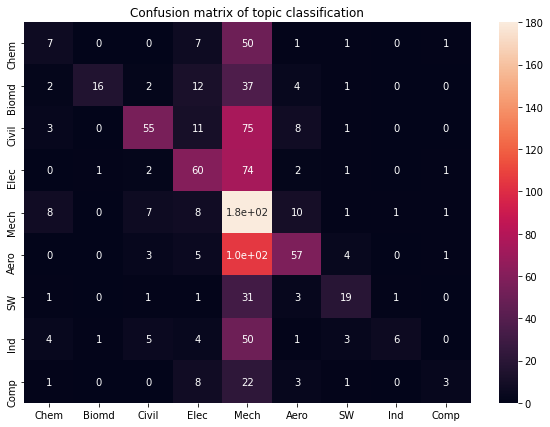

In [ ]:
doc_utils.plotConfMatrix(y_test_FFNN_W_C, predictions, model = "NN")

### arXiv dataset

In [ ]:
top1_acc_list = []
top2_acc_list = []

n_runs = 30

for i in tqdm(range(n_runs)):
    clear_session()
    #Neural Architecture Definition
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(len(dictionary_FFNN_A_C),)))
    model.add(Dense(len(doc_utils.ARXIV_WIKI_TOPICS), activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy', top2_accuracy])
    hist = model.fit(x_train_FFNN_A_C, y_train_FFNN_A_C, epochs=5,verbose=0)
    model_top1_acc = model.evaluate(x_test_FFNN_A_C, y_test_FFNN_A_C, verbose=0)[1]
    model_top2_acc = model.evaluate(x_test_FFNN_A_C, y_test_FFNN_A_C, verbose=0)[2]
         
    if top2_acc_list and model_top2_acc >= max(top2_acc_list):
        #save best model to date
        model_json = model.to_json()
        with open("arxiv_model_arq1.json", "w") as f:
            f.write(model_json)
        model.save_weights("arxiv_model_arq1.h5")
    
    top1_acc_list.append(model_top1_acc)
    top2_acc_list.append(model_top2_acc)

print("\nResulting Average TOP1 acc:{}\t TOP2 acc:{}".format(np.mean(top1_acc_list),np.mean(top2_acc_list)))
print("Best model accuracies: TOP1:{} \t TOP2:{}".format(max(top1_acc_list), max(top2_acc_list)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  




Resulting Average TOP1 acc:0.19512499968210856	 TOP2 acc:0.3532499998807907
Best model accuracies: TOP1:0.23499999940395355 	 TOP2:0.4099999964237213


In [ ]:
json_f = open('arxiv_model_arq1.json', 'r')
best_model_json = json_f.read()
json_f.close()
best_model = model_from_json(best_model_json)
best_model.load_weights("arxiv_model_arq1.h5")#loading weights

# evaluate loaded model on test data
best_model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy', top2_accuracy])
predictions = best_model.predict_classes(x_test_FFNN_A_C) #for later building confusion matrix
print("Best FFNN model TOP-1 acc.:",best_model.evaluate(x_test_FFNN_A_C, y_test_FFNN_A_C, verbose=0)[1])
print("Best FFNN model TOP-2 acc.:",best_model.evaluate(x_test_FFNN_A_C, y_test_FFNN_A_C, verbose=0)[2])

Best FFNN model TOP-1 acc.: 0.23499999940395355
Best FFNN model TOP-2 acc.: 0.4099999964237213


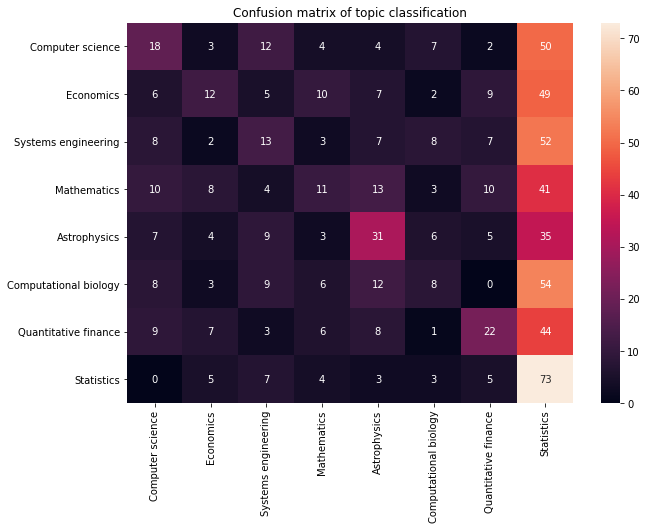

In [ ]:
doc_utils.plotConfMatrix(y_test_FFNN_A_C, predictions, model = "NN", dataset_type="arxiv")

#5. Maximum Similarity Classifier GridSearch and Evaluation

In [ ]:
MSC_hgrid  = {
        'preprocess' : ['simple','custom'],
        'dm' : [0,1],
        'vector_size': [50, 100,200,300],
        'min_count': [1, 2, 3],
        'epochs': [50, 75, 100],
        'window': [3, 5, 10]
    }

In [ ]:
MSC_arxiv_models_params = list()

In [ ]:
for epochs in MSC_hgrid['epochs']:
    for preprocess in MSC_hgrid['preprocess']:
        for dm in MSC_hgrid['dm']:
            for vector_size in MSC_hgrid['vector_size']:
                for min_count in MSC_hgrid['min_count']:
                    for window in MSC_hgrid['window']:

                        MSC = MaxSimClassifier("arxiv", preprocess,vector_size, min_count, epochs, dm, window,workers=8)
                        MSC.fit(x_train_CLF_A, y_train_CLF_A)
                        top2acc = MSC.score(arxiv_dataset, y_test_CLF_A,eval="top2")
                        params = {'preprocess': preprocess,'dm':dm ,'epochs': epochs,
                                  'vector_size':vector_size, 'min_count':min_count,'window':window}
                        MSC_arxiv_models_params.append((top2acc, params))
                        print("[MSC]:preprocess:{}, epochs:{}, dm:{}, vector_size:{}, min_count:{}, window:{} ==> TOP-2 Acc: {:.4f}".format(
                           preprocess, epochs,dm,vector_size,min_count,window,top2acc
                        ))

In [ ]:
import pickle #saving for reference later
pickle.dump( MSC_arxiv_models_params, open( "MSC_arxiv_models_params.table", "wb" ) )

In [ ]:
df = pd.DataFrame.from_dict(MSC_arxiv_models_params)
df.columns = ['Top-2 Acc.', 'MSC Classifier Parameters']
DataTable(df.sort_values(by=['Top-2 Acc.'], ascending=False))

,Top-2 Acc.,MSC Classifier Parameters
73,0.62000,"{'preprocess': 'custom', 'dm': 0, 'epochs': 50..."
100,0.61875,"{'preprocess': 'custom', 'dm': 0, 'epochs': 50..."
74,0.61875,"{'preprocess': 'custom', 'dm': 0, 'epochs': 50..."
82,0.61875,"{'preprocess': 'custom', 'dm': 0, 'epochs': 50..."
102,0.61875,"{'preprocess': 'custom', 'dm': 0, 'epochs': 50..."
...,...,...
573,0.44250,"{'preprocess': 'custom', 'dm': 1, 'epochs': 12..."
483,0.44125,"{'preprocess': 'simple', 'dm': 1, 'epochs': 12..."
504,0.44000,"{'preprocess': 'simple', 'dm': 1, 'epochs': 12..."
492,0.43875,"{'preprocess': 'simple', 'dm': 1, 'epochs': 12..."


In [ ]:
best_hparams = {'preprocess': 'custom', 'dm': 0, 'epochs': 50, 'vector_size': 50, 'min_count': 1, 'window': 3}

## Evaluating MaxSimClassifier on documents using topic definitions


##Wiki dataset

In [ ]:
max_sim_model = MaxSimClassifier("wiki", best_hparams['preprocess'], best_hparams['vector_size'],best_hparams['min_count'],
                                 best_hparams['epochs'],best_hparams['dm'],best_hparams['window'],workers=4)
max_sim_model.fit(x_train_CLF_W, y_train_CLF_W)
#Obtaining TOP-2 Accuracy
max_sim_model.score(x_test_CLF_W, y_test_CLF_W,eval="top2")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.7668341708542713

In [ ]:
max_sim_model.score(x_test_CLF_W, y_test_CLF_W,eval="top1")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.6100502512562814

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


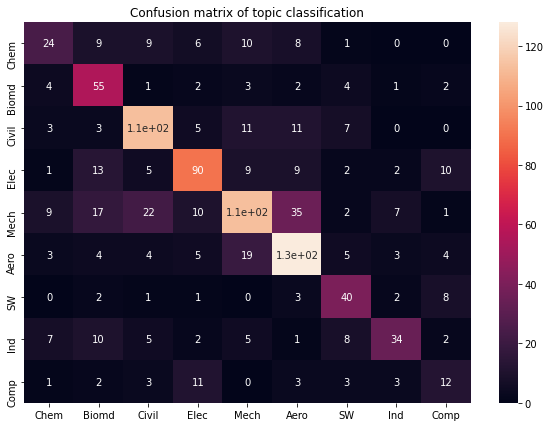

In [ ]:
MSC_predictions = max_sim_model.predict(x_test_CLF_W)
doc_utils.plotConfMatrix(y_test_CLF_W, MSC_predictions, model="MSC", dataset_type='wiki')

## arXiv dataset

In [ ]:
max_sim_model = MaxSimClassifier("arxiv", best_hparams['preprocess'], best_hparams['vector_size'],best_hparams['min_count'],
                                 best_hparams['epochs'],best_hparams['dm'],best_hparams['window'],workers=4)
max_sim_model.fit(x_train_CLF_A, y_train_CLF_A)
#Obtaining TOP-2 Accuracy
max_sim_model.score(x_test_CLF_A, y_test_CLF_A,eval="top2")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.62125

In [ ]:
max_sim_model.score(x_test_CLF_A, y_test_CLF_A,eval="top1") #Obtaining TOP-1 Acc

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.42125

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


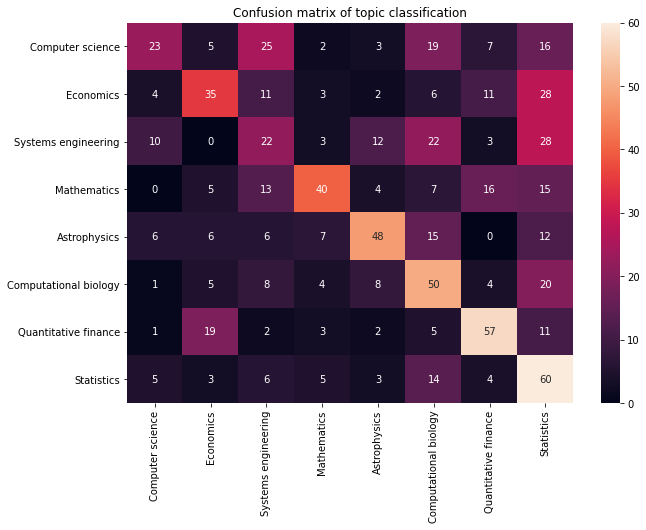

In [ ]:
MSC_predictions = max_sim_model.predict(x_test_CLF_A)
doc_utils.plotConfMatrix(y_test_CLF_A, MSC_predictions, model="MSC", dataset_type='arxiv')

## Trying to improve MSC through pseudo-labelling

### Wiki extended dataset with pseudo-labeled data

In [ ]:
max_sim_model_pl = MaxSimClassifier("wiki", best_hparams['preprocess'], best_hparams['vector_size'],best_hparams['min_count'],
                                 best_hparams['epochs'],best_hparams['dm'],best_hparams['window'],workers=4)

max_sim_model_pl.fit(x_train_CLF_W,y_train_CLF_W)

new_x_train = max_sim_model_pl.pseudo_label(x_train_CLF_W, x_test_CLF_W,result="extended" ,debug=True )

### arXiv extended dataset with pseudo-labeled data

In [ ]:
max_sim_model = MaxSimClassifier("arxiv", best_hparams['preprocess'], best_hparams['vector_size'],best_hparams['min_count'],
                                 best_hparams['epochs'],best_hparams['dm'],best_hparams['window'],workers=4)

max_sim_model.fit(x_train_CLF_A,y_train_CLF_A)

pre_pseudolabel_top2acc = max_sim_model.score(x_test_CLF_A, y_test_CLF_A, eval="top2")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
new_x_train = max_sim_model.pseudo_label(x_train_CLF_A, x_test_CLF_A, paperslist, result="extended" ,debug=True )

max_sim_model_pl = MaxSimClassifier("arxiv", best_hparams['preprocess'], best_hparams['vector_size'],best_hparams['min_count'],
                                 best_hparams['epochs'],best_hparams['dm'],best_hparams['window'],workers=4)

max_sim_model_pl.fit(new_x_train, y_train_CLF_A)

post_pseudolabel_top2acc = max_sim_model_pl.score(x_test_CLF_A, y_test_CLF_A, eval="top2")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Topic 0 (Computer science) best matching paper: id #704
	--->True label:[ 7 ]( Statistics ) 		Paper title: A Geometric Theory of Higher-Order Automatic Differentiation
Topic 1 (Economics) best matching paper: id #136
	--->True label:[ 1 ]( Economics ) 		Paper title: The transmission of liquidity shocks via China's segmented money market: evidence from recent market events
Topic 2 (Systems engineering) best matching paper: id #444
	--->True label:[ 4 ]( Astrophysics ) 		Paper title: Examining Travel Patterns and Characteristics in a Bikesharing Network and Implications for Data-Driven Decision Supports: Case Study in the Washington DC Area
Topic 3 (Mathematics) best matching paper: id #304
	--->True label:[ 3 ]( Mathematics ) 		Paper title: Syntactic characterizations of classes of first-order structures in mathematical fuzzy logic
Topic 4 (Astrophysics) best matching paper: id #499
	--->True label:[ 4 ]( Astrophysics ) 		Paper title: What does the information paradox say about the univ

In [ ]:
print("MSC TOP-2 Acc. (standard):", pre_pseudolabel_top2acc)
print("MSC TOP-2 Acc. (pseudo-label extended data):",post_pseudolabel_top2acc)

MSC TOP-2 Acc. (standard): 0.61375
MSC TOP-2 Acc. (pseudo-label extended data): 0.59125


# 6.  Comparing classification via topic definitions against other approaches

Check these notebooks performing tests with two different scenarios:

* Classification by using a subset of articles from each category: [TODO:Add link](https://)
* Classification by using a randomly chosen article from each category: [TODO:Add link](https://)